## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: H1
# EMBRACENET

da fare 
- sistema selezione augmentation in embracenet
- crea grafici AUPRC reti

In [11]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [13]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [14]:
cell_line = CELL_LINES[2]
cell_line

'H1'

---

In [15]:
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline
from BIOINF_tesi.models import EmbraceNetMultimodal
from BIOINF_tesi.models.utils import Kfold_CV_Multimodal


In [16]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [17]:
task = TASKS[0]

In [18]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [19]:
model=EmbraceNetMultimodal

In [20]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:06,590] Using an existing study with name 'H1_active_E_vs_inactive_E_EmbraceNetMultimodal_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  5
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13647477246717785
  Params: 
    dropout_l0: 0.3
    embracement_size: 768
    lr: 0.007960562781557698
    n_post_layers: 1
    n_units_l0: 256
    optimizer: Adam
    selection_probabilities_FFNN: 0.9486233990747391
    weight_decay: 0.00015149359424489398

===============> MODEL TESTING
AUPRC test score: 0.053873759926481496


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:08,150] Using an existing study with name 'H1_active_E_vs_inactive_E_EmbraceNetMultimodal_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  5
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1473770831968845
  Params: 
    embracement_size: 512
    lr: 0.018450619905997317
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.5876645342427843
    weight_decay: 0.0006165943969481833

===============> MODEL TESTING
AUPRC test score: 0.056201710364114116


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:09,555] Using an existing study with name 'H1_active_E_vs_inactive_E_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.05555090578981172
  Params: 
    dropout_l0: 0.5
    embracement_size: 1024
    lr: 0.0008619002316462347
    n_post_layers: 1
    n_units_l0: 64
    optimizer: Nadam
    selection_probabilities_FFNN: 0.39537514153688114
    weight_decay: 0.0027147480659307963

===============> MODEL TESTING
AUPRC test score: 0.0522018778338602



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.05409


In [21]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [22]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [23]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [24]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [25]:
model=EmbraceNetMultimodal

In [26]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:11,171] Using an existing study with name 'H1_active_P_vs_inactive_P_EmbraceNetMultimodal_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3140426246458251
  Params: 
    dropout_l0: 0.0
    embracement_size: 768
    lr: 7.635334551609664e-05
    n_post_layers: 1
    n_units_l0: 256
    optimizer: Adam
    selection_probabilities_FFNN: 0.7873956256820646
    weight_decay: 0.038551045726507555

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:11,397] Using an existing study with name 'H1_active_P_vs_inactive_P_EmbraceNetMultimodal_1_2' instead of creating a new one.


AUPRC test score: 0.13189833099757922


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3044244946372546
  Params: 
    embracement_size: 1024
    lr: 0.0016352871264480764
    n_post_layers: 0
    optimizer: Nadam
    selection_probabilities_FFNN: 0.39267686059548224
    weight_decay: 0.010883731331013379

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:11,629] Using an existing study with name 'H1_active_P_vs_inactive_P_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


AUPRC test score: 0.1337896234446741


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.31388814817617194
  Params: 
    embracement_size: 1024
    lr: 2.9995400542714183e-05
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.18570269535241934
    weight_decay: 0.0026656769630025324

===============> MODEL TESTING
AUPRC test score: 0.13473074276151858



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.13347


In [27]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [28]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [29]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [30]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [31]:
model=EmbraceNetMultimodal

In [32]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:12,010] Using an existing study with name 'H1_active_E_vs_active_P_EmbraceNetMultimodal_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4264829652451913
  Params: 
    embracement_size: 1024
    lr: 0.012730373822889494
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.726646059593751
    weight_decay: 0.0005649013994695835

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:12,337] Using an existing study with name 'H1_active_E_vs_active_P_EmbraceNetMultimodal_1_2' instead of creating a new one.


AUPRC test score: 0.19876315214871934


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.19455313421020803
  Params: 
    dropout_l0: 0.7
    dropout_l1: 0.5
    embracement_size: 768
    lr: 0.016670817549165155
    n_post_layers: 2
    n_units_l0: 64
    n_units_l1: 32
    optimizer: Nadam
    selection_probabilities_FFNN: 0.9167402770786808
    weight_decay: 0.03350205583252759

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:12,543] Using an existing study with name 'H1_active_E_vs_active_P_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


AUPRC test score: 0.1907473977476155


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.28339326245568985
  Params: 
    dropout_l0: 0.7
    dropout_l1: 0.3
    embracement_size: 512
    lr: 0.0001931313382693163
    n_post_layers: 2
    n_units_l0: 32
    n_units_l1: 128
    optimizer: Nadam
    selection_probabilities_FFNN: 0.963870221461588
    weight_decay: 0.007491519553391505

===============> MODEL TESTING
AUPRC test score: 0.18990484831560253



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.19314


In [33]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [34]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [35]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [36]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [37]:
model=EmbraceNetMultimodal

In [38]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:14,218] Using an existing study with name 'H1_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5814650941021029
  Params: 
    dropout_l0: 0.7
    dropout_l1: 0.0
    embracement_size: 768
    lr: 0.0005164579664842224
    n_post_layers: 2
    n_units_l0: 64
    n_units_l1: 32
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.5382075045724273
    weight_decay: 0.001713019127267149

===============> MODEL TESTING
AUPRC test score: 0.40856717960181316


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:14,627] Using an existing study with name 'H1_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5841349588688043
  Params: 
    embracement_size: 768
    lr: 4.770919035587248e-05
    n_post_layers: 0
    optimizer: Nadam
    selection_probabilities_FFNN: 0.6992246609704047
    weight_decay: 0.010743859925568788

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:32:14,921] Using an existing study with name 'H1_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


AUPRC test score: 0.41597503325348445


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5820036762665054
  Params: 
    embracement_size: 768
    lr: 0.03654952785189111
    n_post_layers: 0
    optimizer: Adam
    selection_probabilities_FFNN: 0.8059870328785215
    weight_decay: 0.00020872732962975383

===============> MODEL TESTING
AUPRC test score: 0.4129185755487559



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.41249


In [39]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [40]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [41]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [42]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [43]:
model=EmbraceNetMultimodal

In [44]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (130632) in class 0 will be larger than the number of samples in the majority class (class #0 -> 65316)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:33:39,819] Using an existing study with name 'H1_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (195980) in class 0 will be larger than the number of samples in the majority class (class #0 -> 

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2564455695891502
  Params: 
    embracement_size: 1024
    lr: 1.7700376295360624e-05
    n_post_layers: 0
    optimizer: Nadam
    selection_probabilities_FFNN: 0.5542064061175943
    weight_decay: 0.010776881680987747

===============> MODEL TESTING
AUPRC test score: 0.11078155625003391


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (130432) in class 0 will be larger than the number of samples in the majority class (class #0 -> 65216)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:38:07,097] Using an existing study with name 'H1_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1_2' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (195618) in class 0 will be larger than the number of samples in the majority class (class #0 -

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2566206437691159
  Params: 
    embracement_size: 768
    lr: 0.001049621358158514
    n_post_layers: 0
    optimizer: Nadam
    selection_probabilities_FFNN: 0.6324342344939423
    weight_decay: 0.0009789562226852004

===============> MODEL TESTING
AUPRC test score: 0.22384768894111612


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (130386) in class 0 will be larger than the number of samples in the majority class (class #0 -> 65193)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 20:42:20,760] Using an existing study with name 'H1_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1_2_3' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (195598) in class 0 will be larger than the number of samples in the majority class (class #0

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.25623988883742777
  Params: 
    dropout_l0: 0.3
    embracement_size: 512
    lr: 2.139577471513716e-05
    n_post_layers: 1
    n_units_l0: 128
    optimizer: Adam
    selection_probabilities_FFNN: 0.9399465264396639
    weight_decay: 0.012068223865180784

===============> MODEL TESTING
AUPRC test score: 0.09906993116395496



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.14457


In [45]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [46]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

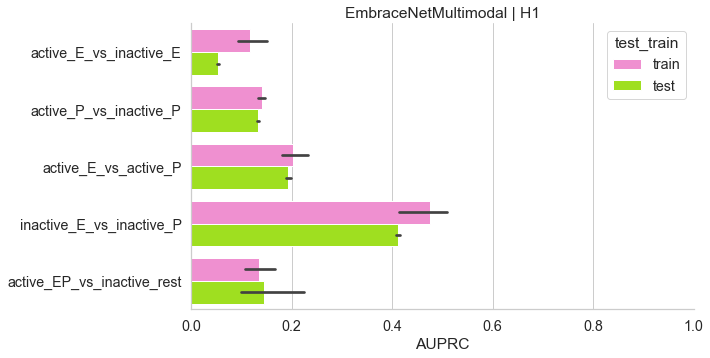

In [47]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])

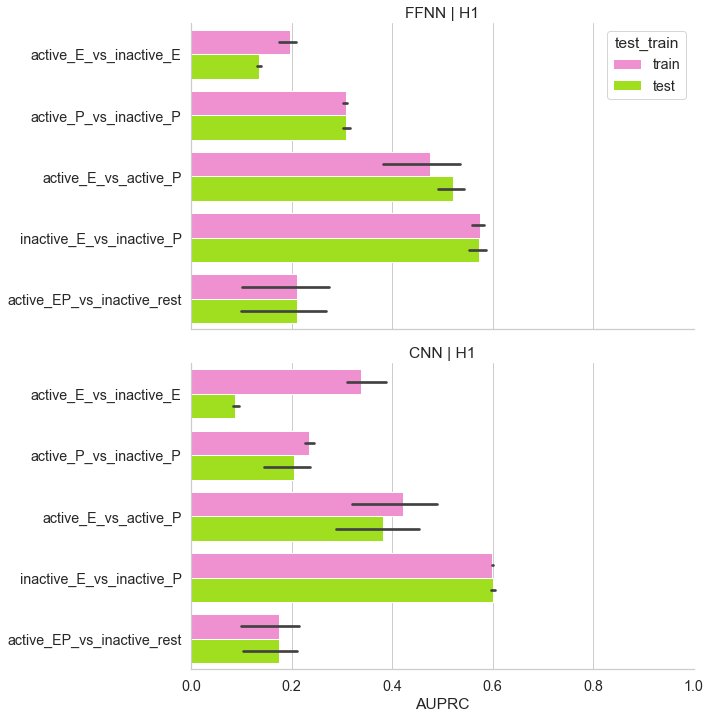

In [48]:
plot_scores(cells=cell_line)